<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/How_To_Use_Pandas_Faster/FastPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How To Use Pandas Faster

In [44]:
import pandas as pd
import numpy as np

In [45]:
def get_data(size=10_000):
  data = pd.DataFrame()
  data["age"] = np.random.randint(0,100,size)
  data["time_in_bed"] = np.random.randint(0,9,size)
  data["pct_sleeping"] = np.random.rand(size)
  data["favorite_food"] = np.random.choice(["fruit_juice","fit_salad","fish_chips","mihlama"],size)
  data["fuckng_food"] = np.random.choice(["candy","sweety_snack","popcorn"],size)
  return data

In [46]:
my_data = get_data()

In [47]:
my_data.describe()

,age,time_in_bed,pct_sleeping
count,10000.000000,10000.00000,10000.000000
mean,49.324700,4.07730,0.496394
std,28.751441,2.58511,0.289336
min,0.000000,0.00000,0.000157
25%,24.000000,2.00000,0.246445
50%,49.000000,4.00000,0.491308
75%,74.000000,6.00000,0.748062
max,99.000000,8.00000,0.999992


In [48]:
my_data.head()

,age,time_in_bed,pct_sleeping,favorite_food,fuckng_food
0,43,0,0.066607,mihlama,sweety_snack
1,6,6,0.061817,fit_salad,candy
2,21,3,0.703415,mihlama,popcorn
3,77,5,0.610045,fit_salad,candy
4,17,5,0.557196,mihlama,popcorn


So far we have generated a pandas dataframe. Let's say we have a problem: <br>
## The Problem 
*   if they were in bed more than 5 hours AND they were sleeping more than 50%, then we will give them favourite_food
*   otherwise we will give them  fuckng_food
* if they are over 90 years old give their favourite_food regardless.

In [49]:
def reward_calculate(row):
  if row["age"] >= 90:
    return row["favorite_food"]
  if (row["time_in_bed"] > 5) & (row["pct_sleeping"]> 0.5):
    return row["favorite_food"]
  return row["fuckng_food"]

- **Level 1 - Loop**

In [50]:
%%timeit
for index, row in my_data.iterrows():
  my_data.loc[index,"reward"] = reward_calculate(row)

6.81 s ± 933 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- **Level 2 - Apply**

In [51]:
%%timeit
my_data["reward"] = my_data.apply(reward_calculate, axis =1) 

188 ms ± 8.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- Level 3 - Vectorized Func

In [52]:
%%timeit
my_data["reward"] = my_data["fuckng_food"]
my_data.loc[(my_data["age"]>=90) | ((my_data["time_in_bed"]>5) & (my_data["pct_sleeping"])),"reward"] = my_data["favorite_food"]

2.6 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- **Results on Plots**

In [55]:
results = pd.DataFrame(
    [
        ["loop",6.81,0.933],
     ["apply",0.188,0.00845],
     ["vectorized",0.0026,0.000000116]
    ],
    columns= ["type","mean","std"]
)

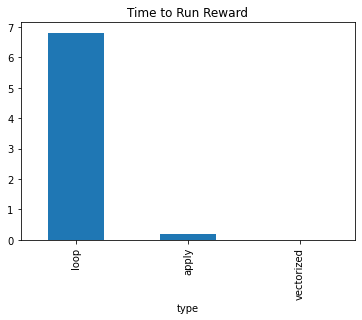

In [56]:
results.set_index("type")["mean"].plot(kind="bar",title= "Time to Run Reward")